##Итоговая Работа Вахтанов А.С. Группа AD11872/2

### Начальные импорты

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline 
sns.set(style="ticks")

np.set_printoptions(precision=3, suppress=True)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.9.2


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from google.colab import drive
drive.mount('/gdrive' )


Mounted at /gdrive


In [ ]:
raw_dataset = pd.read_csv("/gdrive/My Drive/Colab Notebooks/BAUMAN_COURSE/Final_work/data/ebw_data.csv",low_memory=True)

### Датасет

In [ ]:
raw_dataset.shape

(72, 6)

In [ ]:
df = raw_dataset.copy()

### Ананлиз датасета

In [ ]:
df.head()

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48


1.Снижалась величина сварочного тока (IW);
2.Увеличивался ток фокусировки электронного пучка (IF);
3.Увеличивалась скорость сварки (VW);
4.Менялось расстояние от поверхности образцов до электронно-оптической системы (FP). 

In [ ]:
df.isna().sum()

IW       0
IF       0
VW       0
FP       0
Depth    0
Width    0
dtype: int64

In [ ]:
df.describe()

,IW,IF,VW,FP,Depth,Width
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,45.666667,141.333333,8.638889,78.333333,1.195556,1.970417
std,1.678363,5.145763,2.061078,21.493530,0.225081,0.279040
min,43.000000,131.000000,4.500000,50.000000,0.800000,1.680000
25%,44.000000,139.000000,8.000000,60.000000,1.080000,1.760000
50%,45.500000,141.000000,9.000000,80.000000,1.200000,1.840000
75%,47.000000,146.000000,10.000000,80.000000,1.290000,2.050000
max,49.000000,150.000000,12.000000,125.000000,1.760000,2.600000


In [ ]:
# Определим уникальные значения по колонкам
sorted(df['IW'].unique())

[43, 44, 45, 46, 47, 48, 49]

In [ ]:
sorted(df['IF'].unique())

[131, 132, 134, 139, 140, 141, 146, 150]

In [ ]:
sorted(df['VW'].unique())

[4.5, 8.0, 9.0, 10.0, 12.0]

In [ ]:
sorted(df['FP'].unique())

[50, 60, 80, 110, 125]

##### Вывод на вход поступают по сути некоторые целые числа не большого разнообразия

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f4e455990>,
      dtype=object)

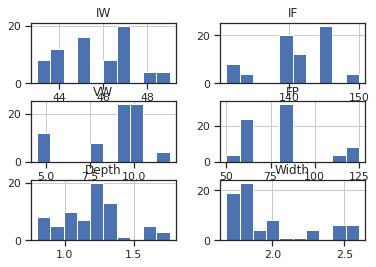

In [ ]:
df.hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


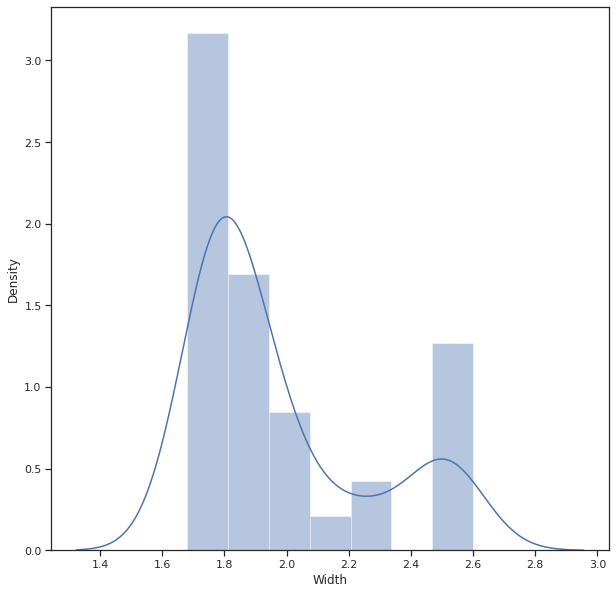

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(df['Width'])

### Анализируем кореляцию

In [ ]:
df.corr()

,IW,IF,VW,FP,Depth,Width
IW,1.000000,-0.861073,-0.043430,0.835530,-0.289568,0.434869
IF,-0.861073,1.000000,0.115093,-0.980562,0.376084,-0.510167
VW,-0.043430,0.115093,1.000000,-0.001060,-0.671437,-0.874257
FP,0.835530,-0.980562,-0.001060,1.000000,-0.510748,0.412962
Depth,-0.289568,0.376084,-0.671437,-0.510748,1.000000,0.425391
Width,0.434869,-0.510167,-0.874257,0.412962,0.425391,1.000000


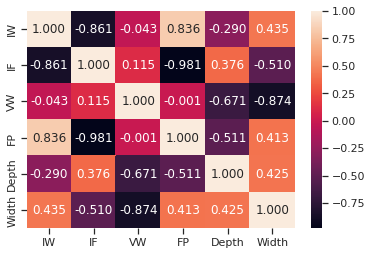

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt='.3f')

**Текст, выделенный полужирным шрифтом**
Выводы - прямой кореляции между данными нет. 
Есть некая кореляция IW и FP (ток сварки и расстояние до образца)
Обратная кореляция между IW и IF (ток сварки и ток фокусировки)
 и сильная обратная кореляция IF, FP (ток фокусировки и расстояние до образца)

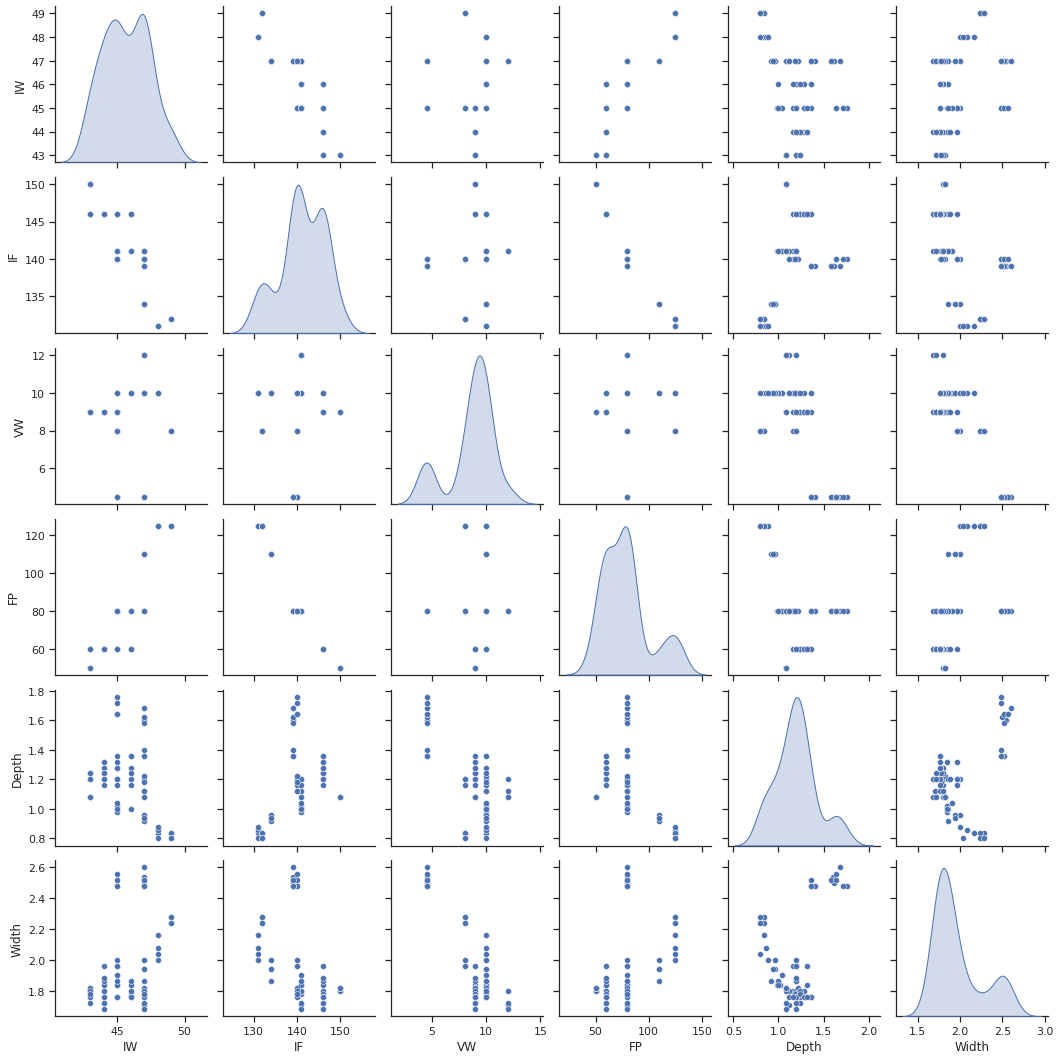

In [ ]:
sns.pairplot(df, diag_kind='kde')

### Подготовим обучающий и тестовый набор

In [ ]:
X = np.array(df.iloc[:,:-2])
y = np.array(df.iloc[:,-2:])

In [ ]:
X[:10]

array([[ 47. , 139. ,   4.5,  80. ],
       [ 47. , 139. ,   4.5,  80. ],
       [ 47. , 139. ,   4.5,  80. ],
       [ 47. , 139. ,   4.5,  80. ],
       [ 45. , 140. ,   4.5,  80. ],
       [ 45. , 140. ,   4.5,  80. ],
       [ 45. , 140. ,   4.5,  80. ],
       [ 45. , 140. ,   4.5,  80. ],
       [ 45. , 140. ,   8. ,  80. ],
       [ 45. , 140. ,   8. ,  80. ]])

In [ ]:
y[:10]

array([[1.6 , 2.54],
       [1.62, 2.5 ],
       [1.68, 2.6 ],
       [1.58, 2.52],
       [1.76, 2.48],
       [1.72, 2.48],
       [1.64, 2.52],
       [1.64, 2.56],
       [1.2 , 2.  ],
       [1.2 , 1.96]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=1)

###Полезные функции

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 2])
    plt.xlabel('Эпоха')
    plt.ylabel('MAE [MPG]')
    plt.legend()
    plt.grid(True)

In [ ]:
def plot_predict(predict,y_test):
    plt.plot(predict[:,0], label='Depth_predict')
    plt.plot(predict[:,1], label='Width_predict')
    plt.plot(y_test[:,0], label='Depth_test')
    plt.plot(y_test[:,1], label='Width_test')
    plt.ylim([0, 4])
    plt.xlabel('номер')
    plt.ylabel('значения')
    plt.legend()
    plt.grid(True)

###Подбор алгоритма

In [ ]:
# Сюда будем сохранять результаты
cols = ['Метод','best_score_','MSE_test','MAE_test']
select_result = pd.DataFrame(columns = cols)

####ВЫБОР НЕЙРОНКИ

In [ ]:
###ВЫПОЛНИТЬ ПОИСК ЛУЧШЕЙ НЕЙРОКИ ГОТОВО
#GSCV_rfr_model_pro = GridSearchCV(rfr_model, rfr_model_params, cv=5, verbose=2)
#from sklearn.model_selection import GridSearchCV

In [ ]:
"""
MLPRegressor(activation='tanh', hidden_layer_sizes=(128, 128, 64), max_iter=100,
             random_state=14)
"""

"\nMLPRegressor(activation='tanh', hidden_layer_sizes=(128, 128, 64), max_iter=100,\n             random_state=14)\n"

In [ ]:
mlpr_model = MLPRegressor(random_state=14)
mlpr_model_params = {
 'hidden_layer_sizes' : [(256, 256, 128, 64, 32),(256, 256, 128), 
                         (64, 64, 32, 16, 8), (64, 64, 32), 
                         (128, 128, 64), (32, 32, 16), (16,16,8)],
 'activation' : ['identity', 'tanh', 'relu'],
 'solver' : [ 'adam'],
 'max_iter' : [50,100,150,200],
 'learning_rate' : ['constant', 'adaptive', 'invscaling'] }
GSCV_mlpr_model = GridSearchCV(mlpr_model, mlpr_model_params, n_jobs=-1, cv=10)
GSCV_mlpr_model.fit(X_train_val, y_train_val)
# GSCV_mlpr_model_upr.best_params_
mlpr_model = GSCV_mlpr_model.best_estimator_

In [ ]:
mlpr_model

MLPRegressor(activation='tanh', hidden_layer_sizes=(128, 128, 64), max_iter=100,
             random_state=14)

In [ ]:
#mlpr_model_upr.evaluate(X_test, y_test, verbose=0)
y_mlpr_pred = mlpr_model.predict(X_test)
MSE_mlpr = mean_squared_error(y_test,y_mlpr_pred)
MAE_mlpr = mean_absolute_error(y_test,y_mlpr_pred)
print(MSE_mlpr)
print(MAE_mlpr)

0.009008587075929423
0.07028698004520503


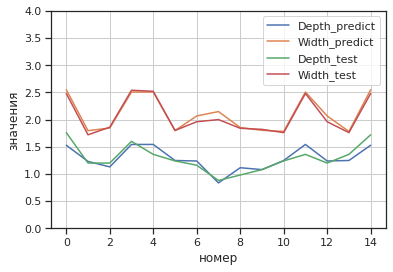

In [ ]:
#Выводим график на тестовой выборке
plot_predict(y_mlpr_pred, y_test)

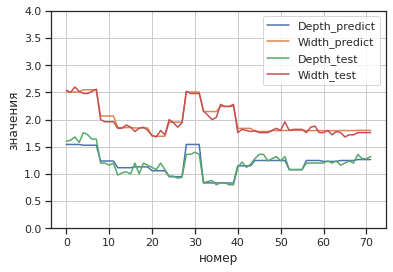

In [ ]:
#Выводим график на всей выборке
result_best_mlpr_full = mlpr_model.predict(X)
plot_predict(result_best_mlpr_full, y)

In [ ]:
select_result =pd.concat([pd.DataFrame([['Нейронная сеть',GSCV_mlpr_model.best_score_,MSE_mlpr,MAE_mlpr]],columns = cols),select_result],ignore_index=True)
select_result

,Метод,best_score_,MSE_test,MAE_test
0,Нейронная сеть,0.77439,0.009009,0.070287


#### Выбор случайного леса


In [ ]:
rfr_model = RandomForestRegressor(random_state=14)
rfr_model_params = {
 'n_estimators' : range(1, 100, 5),
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth' : range(1, 6, 1),
 'criterion':['squared_error'] }
GSCV_rfr_model = GridSearchCV(rfr_model, rfr_model_params, cv=5, verbose=0)
GSCV_rfr_model.fit(X_train_val, y_train_val)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=14),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': range(1, 6),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(1, 100, 5)})

In [ ]:
rfr_model = GSCV_rfr_model.best_estimator_

In [ ]:
# GSCV_rfr_model_upr.best_params_
y_rfr_model_pred = rfr_model.predict(X_test)
MSE_rfr = mean_squared_error(y_test,y_rfr_model_pred)
MAE_rfr = mean_absolute_error(y_test,y_rfr_model_pred)
print(MSE_rfr)
print(MAE_rfr)

0.004881349527022085
0.05150221806833145


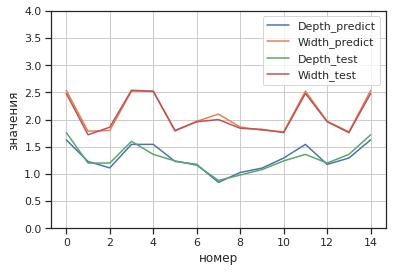

In [ ]:
plot_predict(y_rfr_model_pred, y_test)

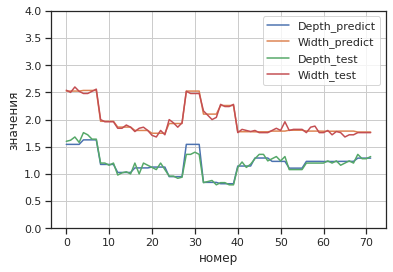

In [ ]:
result_best_rfr_full = rfr_model.predict(X)
plot_predict(result_best_rfr_full, y)

In [ ]:
select_result =pd.concat([pd.DataFrame([['Случайный лес',GSCV_rfr_model.best_score_,MSE_rfr,MAE_rfr]],columns = cols),select_result],ignore_index=True)
select_result

,Метод,best_score_,MSE_test,MAE_test
0,Случайный лес,0.918042,0.004881,0.051502
1,Нейронная сеть,0.774390,0.009009,0.070287


#### Выбор Градиентного бустинга

In [ ]:
gbr_model_1 = GradientBoostingRegressor(random_state=14)
gbr_model_params = {
 'n_estimators' : range(2, 100, 5),
 'learning_rate': [0.001, 0.01, 0.05, 0.1],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth' : range(1, 6, 1),
 'loss':['squared_error']
 }
GSCV_gbr_model_1 = GridSearchCV(gbr_model_1, gbr_model_params, cv=5, verbose=0,error_score='raise')
GSCV_gbr_model_1.fit(X_train_val, y_train_val[:,0])


GridSearchCV(cv=5, error_score='raise',
             estimator=GradientBoostingRegressor(random_state=14),
             param_grid={'learning_rate': [0.001, 0.01, 0.05, 0.1],
                         'loss': ['squared_error'], 'max_depth': range(1, 6),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(2, 100, 5)})

In [ ]:
gbr_model_2 = GradientBoostingRegressor(random_state=14)
GSCV_gbr_model_2 = GridSearchCV(gbr_model_2, gbr_model_params, cv=5, verbose=0,error_score='raise')
GSCV_gbr_model_2.fit(X_train_val, y_train_val[:,1])

GridSearchCV(cv=5, error_score='raise',
             estimator=GradientBoostingRegressor(random_state=14),
             param_grid={'learning_rate': [0.001, 0.01, 0.05, 0.1],
                         'loss': ['squared_error'], 'max_depth': range(1, 6),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(2, 100, 5)})

In [ ]:
gbr_model_1 = GSCV_gbr_model_1.best_estimator_
gbr_model_1

GradientBoostingRegressor(max_depth=4, max_features='auto', n_estimators=32,
                          random_state=14)

In [ ]:
gbr_model_2 = GSCV_gbr_model_2.best_estimator_
gbr_model_2

GradientBoostingRegressor(learning_rate=0.05, max_features='sqrt',
                          n_estimators=97, random_state=14)

In [ ]:
# GSCV_rfr_model_upr.best_params_
y_gbr_model_pred_1 = gbr_model_1.predict(X_test)
y_gbr_model_pred_2 = gbr_model_2.predict(X_test)
y_gbr_model_pred = np.column_stack([y_gbr_model_pred_1,y_gbr_model_pred_2])
MSE_gbr = mean_squared_error(y_test,y_gbr_model_pred)
MAE_gbr = mean_absolute_error(y_test,y_gbr_model_pred)
print(MSE_gbr)
print(MAE_gbr)

0.0044008025749319194
0.05118002286765115


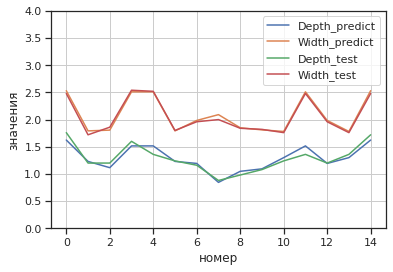

In [ ]:
plot_predict(np.column_stack([y_gbr_model_pred_1,y_gbr_model_pred_2]), y_test)

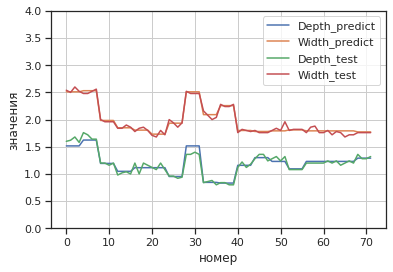

In [ ]:
result_best_gbr_full_1 = gbr_model_1.predict(X)
result_best_gbr_full_2 = gbr_model_2.predict(X)
plot_predict(np.column_stack([result_best_gbr_full_1,result_best_gbr_full_2]), y)

In [ ]:
GSCV_gbr_model_best_score_ = (GSCV_gbr_model_1.best_score_ + GSCV_gbr_model_2.best_score_)/2
select_result =pd.concat([pd.DataFrame([['Градиентный бустинг',GSCV_gbr_model_best_score_,MSE_gbr,MAE_gbr]],columns = cols),select_result],ignore_index=True)
select_result

,Метод,best_score_,MSE_test,MAE_test
0,Градиентный бустинг,0.909742,0.004401,0.051180
1,Случайный лес,0.918042,0.004881,0.051502
2,Нейронная сеть,0.774390,0.009009,0.070287


####Выбор К средних

In [ ]:
knn = KNeighborsRegressor()
knn_model_params = {
   'n_neighbors': [1, 2, 5, 10, 20]
}
GSCV_knr_model = GridSearchCV(estimator=knn, param_grid=knn_model_params, cv=10, verbose=0)
GSCV_knr_model.fit(X_train_val, y_train_val)


GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 5, 10, 20]})

In [ ]:
knn_model = GSCV_knr_model.best_estimator_
knn_model

KNeighborsRegressor(n_neighbors=2)

In [ ]:
y_knr_model_pred = knn_model.predict(X_test)
MSE_knr = mean_squared_error(y_test,y_knr_model_pred)
MAE_knr = mean_absolute_error(y_test,y_knr_model_pred)
print(MSE_knr)
print(MAE_knr)

0.003560000000000002
0.04600000000000003


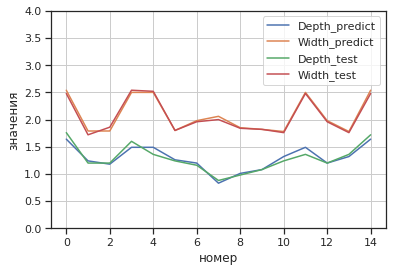

In [ ]:
plot_predict(y_knr_model_pred, y_test)

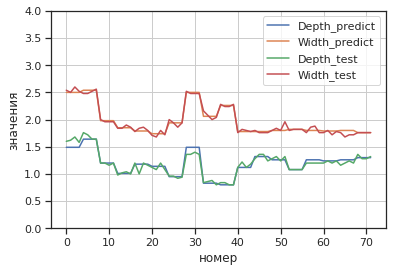

In [ ]:
result_best_knr_full = knn_model.predict(X)
plot_predict(result_best_knr_full, y)

In [ ]:
select_result =pd.concat([pd.DataFrame([['Регрессия К срдених',GSCV_knr_model.best_score_,MSE_knr,MAE_knr]],columns = cols),select_result],ignore_index=True)
select_result

,Метод,best_score_,MSE_test,MAE_test
0,Регрессия К срдених,0.822135,0.003560,0.046000
1,Градиентный бустинг,0.909742,0.004401,0.051180
2,Случайный лес,0.918042,0.004881,0.051502
3,Нейронная сеть,0.774390,0.009009,0.070287


###РЕЗУЛЬТАТЫ

In [ ]:
select_result

,Метод,best_score_,MSE_test,MAE_test
0,Регрессия К срдених,0.822135,0.003560,0.046000
1,Градиентный бустинг,0.909742,0.004401,0.051180
2,Случайный лес,0.918042,0.004881,0.051502
3,Нейронная сеть,0.774390,0.009009,0.070287


Вывод: KNN лучше всех и быстрее - выбираем его!! И сохраняем

####Сохраняем финальную модель

In [ ]:
import pickle
pickle_model_file = '/gdrive/My Drive/Colab Notebooks/BAUMAN_COURSE/Final_work/knn_model.pkl'
with open(pickle_model_file,'wb') as file:
  pickle.dump(knn_model,file)


In [ ]:
with open(pickle_model_file,'rb') as file:
  pickle_model = pickle.load(file)
Ypredict_base = knn_model.predict(X_test)
Ypredict_pckl = pickle_model.predict(X_test)
Ypredict_base == Ypredict_pckl

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True]])